In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [155]:
hbn_df = pd.read_csv('/Users/arqavan/Downloads/HBN.csv')
hbn_df_copy = hbn_df.copy()
hbn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 83 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              3960 non-null   int64  
 1   id                                      3960 non-null   object 
 2   Enrol_Season                            3960 non-null   object 
 3   Age                                     3960 non-null   int64  
 4   Sex                                     3960 non-null   int64  
 5   CGAS-Season                             2555 non-null   object 
 6   CGAS-Score                              2421 non-null   float64
 7   Physical-Season                         3310 non-null   object 
 8   Physical-BMI                            3022 non-null   float64
 9   Physical-Height                         3027 non-null   float64
 10  Physical-Weight                         3076 non-null   floa

In [156]:
hbn_df.describe()

,Unnamed: 0,Age,Sex,CGAS-Score,Physical-BMI,Physical-Height,Physical-Weight,Physical-Waist_Circumference,Physical-Diastolic_BP,Physical-HeartRate,...,PCIAT-PCIAT_16,PCIAT-PCIAT_17,PCIAT-PCIAT_18,PCIAT-PCIAT_19,PCIAT-PCIAT_20,PCIAT-PCIAT_Total,SDS-SDS_Total_Raw,SDS-SDS_Total_T,PreInt_EduHx-computerinternet_hoursday,sii
count,3960.000000,3960.000000,3960.000000,2421.000000,3022.000000,3027.000000,3076.000000,898.000000,2954.000000,2967.000000,...,2728.000000,2725.000000,2728.000000,2730.000000,2733.000000,2736.000000,2609.000000,2606.000000,3301.000000,2736.000000
mean,1979.500000,10.433586,0.372727,65.454771,19.331929,55.946713,89.038615,27.278508,69.648951,81.597236,...,1.452346,1.627890,1.613636,1.158974,0.943652,27.896199,41.088923,57.763622,1.060588,0.580409
std,1143.297861,3.574648,0.483591,22.341862,5.113934,7.473764,44.569040,5.567287,13.611226,13.665196,...,1.495600,1.445622,1.529178,1.343661,1.185460,20.338853,10.427433,13.196091,1.094875,0.771122
min,0.000000,5.000000,0.000000,25.000000,0.000000,33.000000,0.000000,18.000000,0.000000,27.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,38.000000,0.000000,0.000000
25%,989.750000,8.000000,0.000000,59.000000,15.869350,50.000000,57.200000,23.000000,61.000000,72.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000,33.000000,47.000000,0.000000,0.000000
50%,1979.500000,10.000000,0.000000,65.000000,17.937682,55.000000,77.000000,26.000000,68.000000,81.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,26.000000,39.000000,55.000000,1.000000,0.000000
75%,2969.250000,13.000000,1.000000,75.000000,21.571244,62.000000,113.800000,30.000000,76.000000,90.500000,...,2.000000,3.000000,2.000000,2.000000,1.000000,41.000000,46.000000,64.000000,2.000000,1.000000
max,3959.000000,22.000000,1.000000,999.000000,59.132048,78.500000,315.000000,50.000000,179.000000,138.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,93.000000,96.000000,100.000000,3.000000,3.000000


In [157]:
hbn_df = hbn_df.dropna(thresh=len(hbn_df) * 0.5, axis=1)
hbn_df = hbn_df.dropna(thresh=hbn_df.shape[1] * 0.3, axis=0)

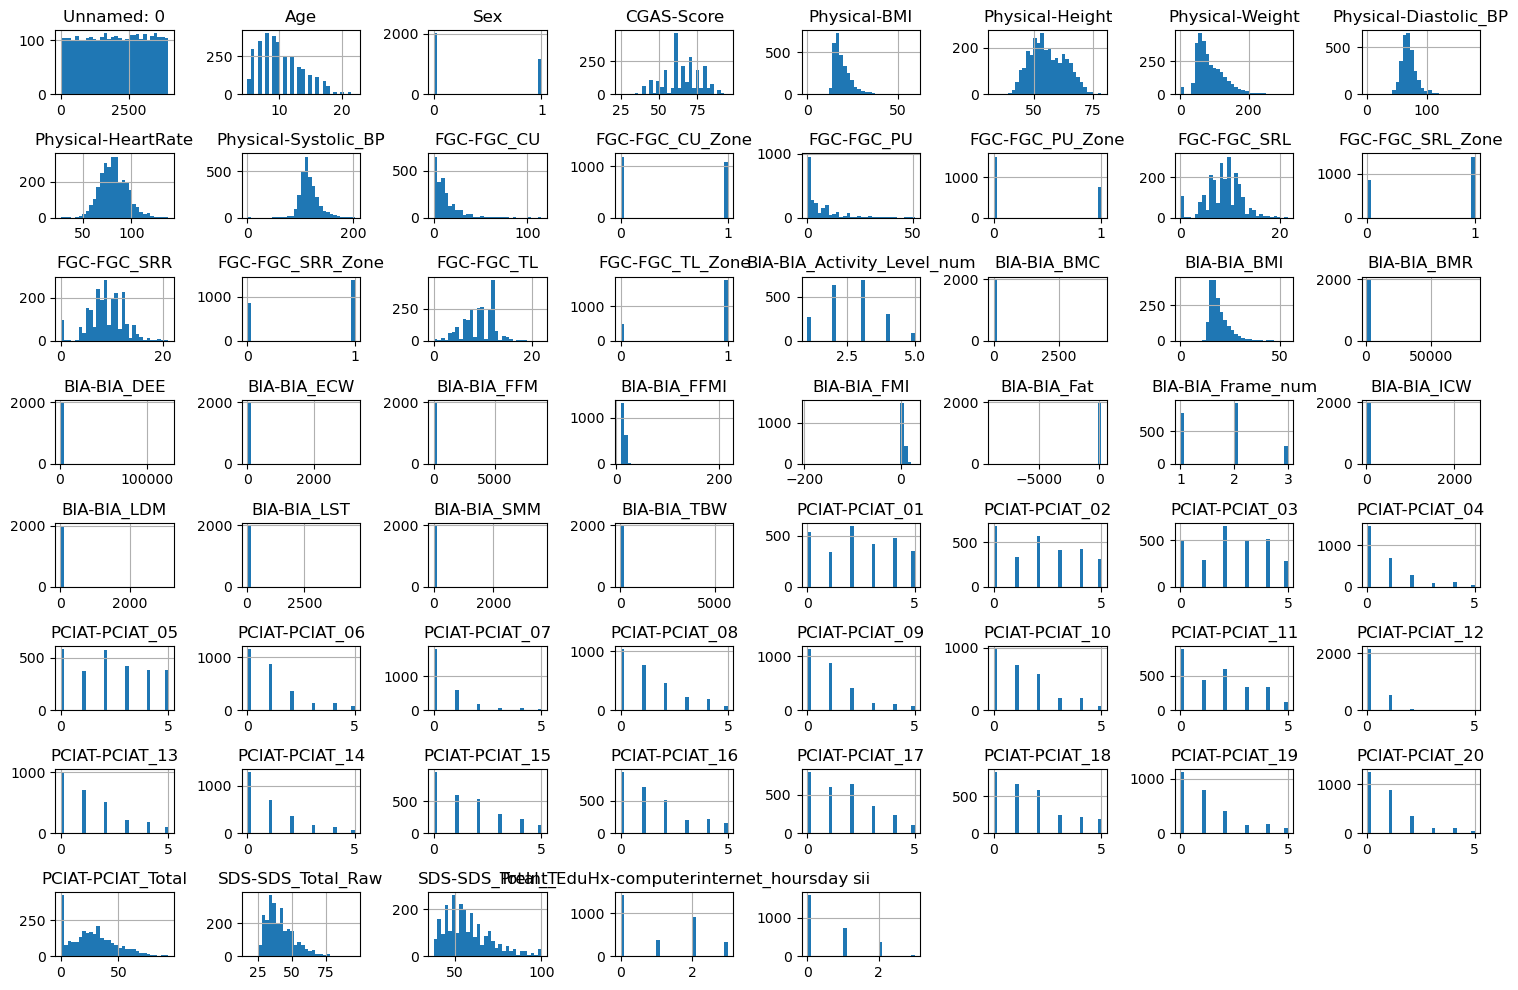

In [158]:
hbn_df.hist(figsize = (15, 10), bins = 30)
plt.tight_layout()
plt.show()

normal_columns:

Physical-Height
Physical-Diastolic_BP
Physical-HeartRate
Physical-Systolic_BP
PAQ_C-PAQ_C_Total

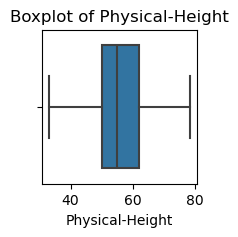

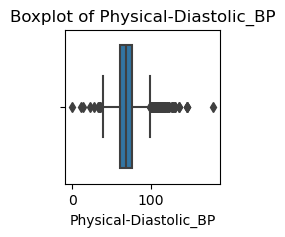

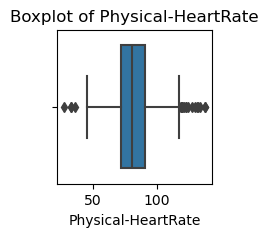

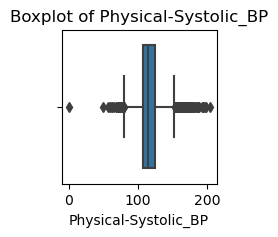

In [159]:
normal_columns = hbn_df[['Physical-Height', 'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP']]

normal_columns.describe()
for column in normal_columns:
    plt.figure(figsize=(2, 2)) 
    sns.boxplot(x=hbn_df[column]) 
    plt.title(f"Boxplot of {column}")  
    plt.xlabel(column)  
    plt.show()

In [160]:
# filling nan values by mean and median

# filling  'PAQ_C-PAQ_C_Total' and 'Physical-Height' by mean because they dont have outliers

#PAQ_C_PAQ_C_Total_mean = hbn_df['PAQ_C-PAQ_C_Total'].mean()
#hbn_df['PAQ_C-PAQ_C_Total'] = hbn_df['PAQ_C-PAQ_C_Total'].fillna(PAQ_C_PAQ_C_Total_mean)

Physical_Height_mean = hbn_df['Physical-Height'].mean()
hbn_df['Physical-Height'] = hbn_df['Physical-Height'].fillna(Physical_Height_mean)

# filling others by median (outliers)

Physical_Diastolic_BP_median = hbn_df['Physical-Diastolic_BP'].median()
hbn_df['Physical-Diastolic_BP'] = hbn_df['Physical-Diastolic_BP'].fillna(Physical_Diastolic_BP_median)

Physical_HeartRate_BP_median = hbn_df['Physical-HeartRate'].median()
hbn_df['Physical-HeartRate'] = hbn_df['Physical-HeartRate'].fillna(Physical_Diastolic_BP_median)

Physical_Systolic_BP_median = hbn_df['Physical-Systolic_BP'].median()
hbn_df['Physical-Systolic_BP'] = hbn_df['Physical-Systolic_BP'].fillna(Physical_Diastolic_BP_median)


In [161]:
# Select the columns that contain the season information
season_columns = []
for column in hbn_df.columns:
    if 'Season' in column:
        season_columns.append(column)

# Define equivalent numerical values for each season
season_mapping = {'Spring': 0, 'Summer': 1, 'Fall': 2, 'Winter': 3}

# Change the season values to numerical values
for column in season_columns:
    hbn_df[column] = hbn_df[column].apply(lambda x: season_mapping.get(x) if pd.notna(x) else x)

# Fill the missing values of the season columns by the mode function
for column in season_columns:
    if column in hbn_df.columns and (hbn_df[column].isnull().sum() > 0):
        hbn_df[column] = hbn_df[column].fillna(hbn_df[column].mode()[0])
        hbn_df[column] = hbn_df[column].astype(int)  # Convert the column to integer (similar to other season columns)

## Ensure that only numeric columns are selected
numeric_columns = hbn_df.select_dtypes(include=['float64']).columns

# Fill NaN values in other columns by KNN Imputation
imputer_algorithm = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
hbn_df[numeric_columns] = imputer_algorithm.fit_transform(hbn_df[numeric_columns])

hbn_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3166 entries, 0 to 3958
Data columns (total 70 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              3166 non-null   int64  
 1   id                                      3166 non-null   object 
 2   Enrol_Season                            3166 non-null   int64  
 3   Age                                     3166 non-null   int64  
 4   Sex                                     3166 non-null   int64  
 5   CGAS-Season                             3166 non-null   int64  
 6   CGAS-Score                              3166 non-null   float64
 7   Physical-Season                         3166 non-null   int64  
 8   Physical-BMI                            3166 non-null   float64
 9   Physical-Height                         3166 non-null   float64
 10  Physical-Weight                         3166 non-null   float64
 

In [162]:
PCIAT_columns = []
for column in hbn_df.columns:
    if 'PCIAT' in column:
        PCIAT_columns.append(column)

hbn_df = hbn_df.drop(columns=PCIAT_columns, errors='ignore')

hbn_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3166 entries, 0 to 3958
Data columns (total 48 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              3166 non-null   int64  
 1   id                                      3166 non-null   object 
 2   Enrol_Season                            3166 non-null   int64  
 3   Age                                     3166 non-null   int64  
 4   Sex                                     3166 non-null   int64  
 5   CGAS-Season                             3166 non-null   int64  
 6   CGAS-Score                              3166 non-null   float64
 7   Physical-Season                         3166 non-null   int64  
 8   Physical-BMI                            3166 non-null   float64
 9   Physical-Height                         3166 non-null   float64
 10  Physical-Weight                         3166 non-null   float64
 

In [163]:
#unsupervised_learning
hbn_df = hbn_df.drop_duplicates()
hbn_df = hbn_df.drop(['id','sii'], axis = 1)
num_columns = hbn_df.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
data_scaled = scaler.fit_transform(hbn_df[num_columns])
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)
cluster_labels = kmeans.labels_


/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [164]:
db_score = davies_bouldin_score(data_scaled, cluster_labels)

print(f"Davies-Bouldin Index: {db_score}")

score = silhouette_score(data_scaled, cluster_labels)
print(f"Silhouette Score: {score}")

Davies-Bouldin Index: 1.822186509548602
Silhouette Score: 0.12732604376903625


داده های پرت باید اوکی شوند.